# Lab 3: Clustering and Manifold Learning

## A: Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

# Load the dataset
df = pd.read_csv("./loans_train_prepared.csv")
data = np.array(df.values, dtype=float)

print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


In [9]:
# View head of dataset for clarity
df.head(5)

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305



## B: Rescale data

In [10]:
# This is using MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)


## C: Scatterplot function

In [11]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=400)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')


## D: K-means clustering

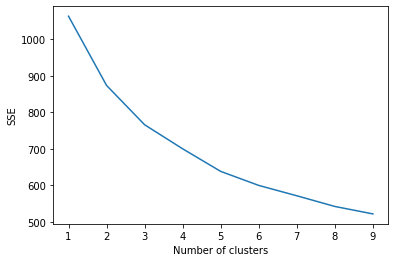

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()


It is hard to say for sure but I am going to say k = 5 in this case.

In [24]:
k=5

In [25]:
# Running kmeans
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)


## E: Applying a manifold technique for 2D visualization

In [26]:
# Append cluster centers to dataset
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [27]:
# Apply MDS to project to 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


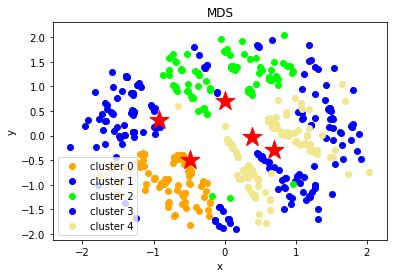

In [28]:
# Plotting the transformations
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [29]:
# Apply t-SNE to project to 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


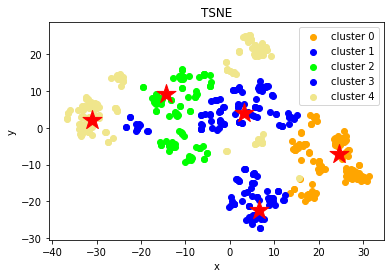

In [30]:
# Plotting the transformations
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

## F: Cluster analysis

In [31]:
# Add cluster label as extra column to original df
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [32]:
df.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086,2
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711,1
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189,4
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012,4
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305,2


In [33]:
df.tail()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
609,0.000000,0.666409,0.676143,0.750,1,0,0,0,0,0,0,0,0,0,1,0.364708,2
610,1.000000,0.858916,0.395858,0.375,1,1,0,1,0,0,0,0,0,0,1,0.587496,4
611,0.333333,1.313719,1.566110,0.750,1,1,0,1,0,0,0,0,0,1,1,1.116075,4
612,0.666667,1.267616,1.325676,0.750,1,1,0,1,0,0,0,0,0,1,1,1.042256,4
613,0.000000,0.925883,1.074155,0.750,0,0,0,0,0,1,0,0,1,0,0,0.663523,3


In [34]:
# Compute the mean value of each attribute for each cluster
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.308642,0.922554,1.119394,0.720741,0.985185,0.844444,0.014815,1.000000,0.000000,0.133333,0.029630,0.177778,1.000000,0.000000,0.896296,0.899543
1,0.302260,0.895767,1.105226,0.710169,0.389831,0.847458,0.033898,0.838983,0.000000,0.135593,0.033898,0.322034,0.135593,0.432203,0.000000,0.857274
2,0.078261,0.876531,0.994480,0.735870,0.991304,0.643478,0.008696,0.000000,0.008696,0.104348,0.078261,0.191304,0.000000,0.513043,0.686957,0.787636
3,0.097561,0.928556,1.000477,0.725915,0.853659,0.548780,0.024390,0.000000,0.024390,0.158537,0.060976,0.207317,1.000000,0.000000,0.707317,0.783217
4,0.353659,0.948764,1.115008,0.687500,0.987805,0.951220,0.024390,1.000000,0.000000,0.140244,0.060976,0.201220,0.000000,0.560976,1.000000,0.928600


## Conclusion:

From looking at the above table we can argue that:


Cluster 0 contains the highest loan amount which is the hiest value overall

Cluster 4 has the heighest values consistantly accross all fields

Clusters 0 and 4 have the highest applicant income and also contain those most likely to be married.